In [1]:
import csv
with open('IBB_holdings.csv', 'r') as csvfile:
    file = csv.reader(csvfile,delimiter=' ')
    c=0
    list_tickers=[]
    for row in file:
        if c>=11:
            list_tickers.append(row[0].split(',')[0])
        c+=1
            
csvfile.close()

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

In [3]:
symbol = 'WIKI/NSTG'
date=datetime.date
df = web.DataReader(symbol, 'quandl', '2015-01-01', str(date.today()))
df.head()



,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-07,6.80,6.93,6.62,6.69,84943.0,0.0,1.0,6.80,6.93,6.62,6.69,84943.0
2018-02-06,6.54,6.83,6.50,6.80,120322.0,0.0,1.0,6.54,6.83,6.50,6.80,120322.0
2018-02-05,6.91,7.02,6.54,6.71,132698.0,0.0,1.0,6.91,7.02,6.54,6.71,132698.0
2018-02-02,7.18,7.36,6.94,6.95,119567.0,0.0,1.0,7.18,7.36,6.94,6.95,119567.0
2018-02-01,7.49,7.55,7.07,7.24,138886.0,0.0,1.0,7.49,7.55,7.07,7.24,138886.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-08,13.37,13.500,12.88,13.09,54773.0,0.0,1.0,13.37,13.500,12.88,13.09,54773.0
2015-01-07,13.85,13.850,12.97,13.37,51169.0,0.0,1.0,13.85,13.850,12.97,13.37,51169.0
2015-01-06,14.32,14.446,13.36,13.69,56461.0,0.0,1.0,14.32,14.446,13.36,13.69,56461.0
2015-01-05,13.94,14.740,13.94,14.20,72237.0,0.0,1.0,13.94,14.740,13.94,14.20,72237.0
2015-01-02,13.99,14.240,13.33,13.86,55970.0,0.0,1.0,13.99,14.240,13.33,13.86,55970.0


In [5]:
# filter on one day of data
day = df[ '2018-01-19' ]

In [6]:
# let's flip the time series
df_flipped = df.sort_index( ascending=True )

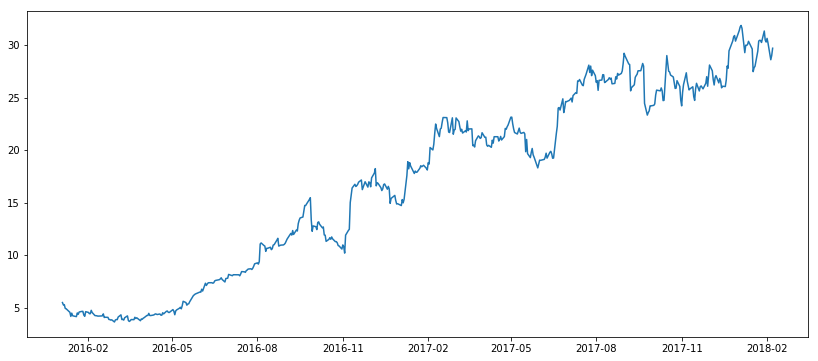

In [16]:
#plot a single series
plt.plot( df[ 'Close' ] );
# or multiple
#plt.plot( day[ ['High', 'Low' ] ] )

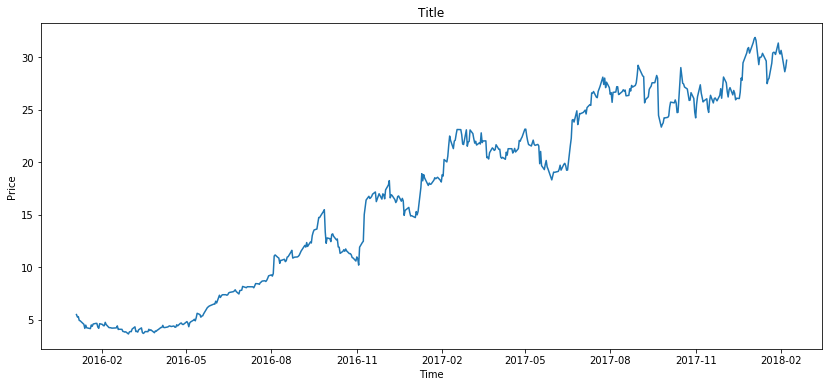

In [18]:
# maybe with some labels 
plt.plot( df[ 'Close' ] )
plt.title( 'Title' )
plt.xlabel( 'Time' )
plt.ylabel( 'Price' );

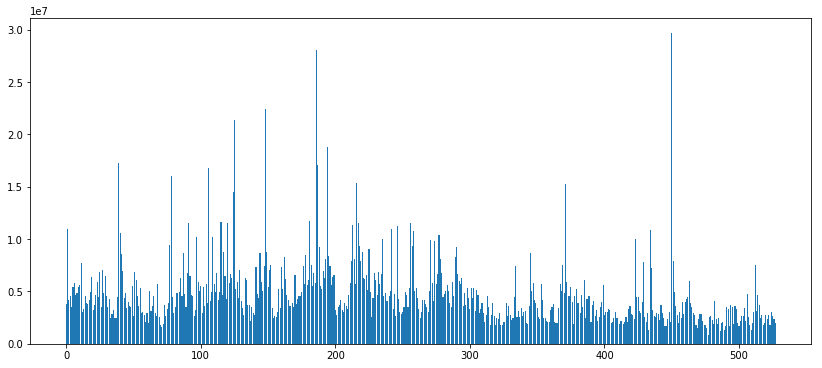

In [19]:
#Volume chart
xaxis = np.arange( len(df['Volume']) )
plt.bar( xaxis , df[ 'Volume' ] );

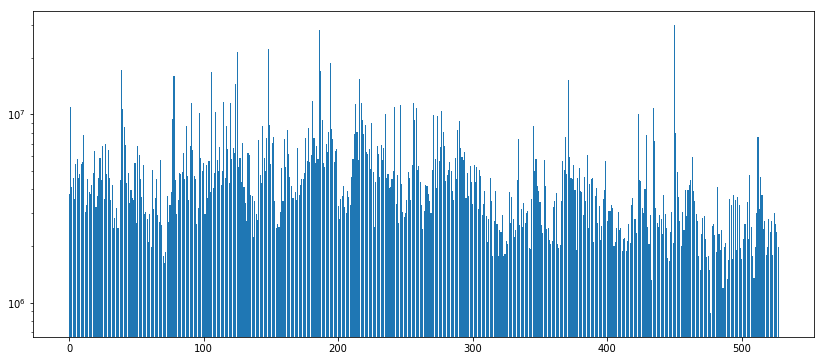

In [20]:
# Maybe use log?
plt.bar( xaxis, df[ 'Volume' ], log=True );

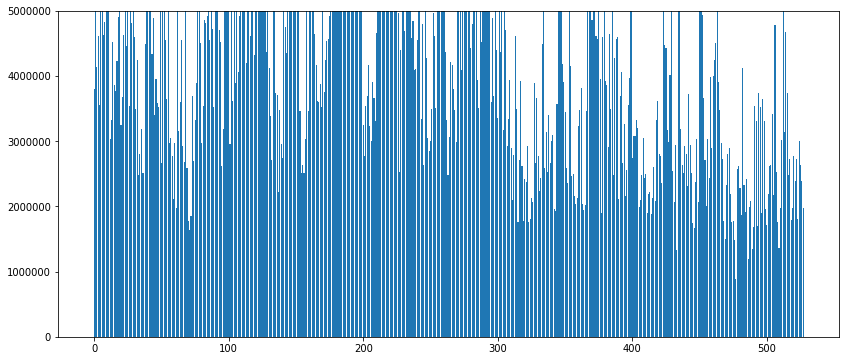

In [22]:
# or maybe filter?
plt.ylim( 0, 5000000 )
plt.bar( xaxis, df[ 'Volume' ] );

In [32]:
dict_tickers={}
for i in list_tickers:
    dict_tickers[i]=4

In [33]:
#On Quandl
compt_succ=0
compt_echec=0
list_dataframes=[]
for i in range (len(list_tickers)-2):
    symbol = 'WIKI/'+list_tickers[i]
    try:
        df = web.DataReader(symbol, 'quandl', '2016-01-01','2018-01-01' )
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
        dict_tickers[list_tickers[i]]-=1
print(compt_succ,compt_echec)

    

Oops!  That was no valid ticker.  Try again... BIIB
Oops!  That was no valid ticker.  Try again... NKTR
Oops!  That was no valid ticker.  Try again... BIVV
Oops!  That was no valid ticker.  Try again... JUNO
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... JAZZ
Oops!  That was no valid ticker.  Try again... SGEN
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... IONS
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... FGEN
Oops!  That was no valid ticker.  Try again... AVXS
Oops!  That was no valid ticker.  Try again... SYNH
Oops!  That was no valid ticker.  Try again... BGNE
Oops!  That was no valid ticker.  Try again... ACAD
Oops!  That was no valid ticker.  Try again... GRFS
Oops!  That was no valid ticker.  Try again... BPMC
Oops!  That was no valid ticker.  Try again... LGND
Oops!  That was no valid ticker.  Try again... GWPH
Oops!  That 

In [34]:
#On Yahoo
compt_succ=0
compt_echec=0
list_dataframes=[]
for i in range (len(list_tickers)-2):
    symbol = list_tickers[i]
    try:
        df = web.DataReader(symbol, 'yahoo' , '2016-01-01','2018-01-01')
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
        dict_tickers[list_tickers[i]]-=1
print(compt_succ,compt_echec)

Oops!  That was no valid ticker.  Try again... REGN
Oops!  That was no valid ticker.  Try again... ALXN
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... ACAD
Oops!  That was no valid ticker.  Try again... CLVS
Oops!  That was no valid ticker.  Try again... FOLD
Oops!  That was no valid ticker.  Try again... HALO
Oops!  That was no valid ticker.  Try again... RDUS
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... INVA
Oops!  That was no valid ticker.  Try again... EDIT
Oops!  That was no valid ticker.  Try again... ENDP
Oops!  That was no valid ticker.  Try again... ATRA
Oops!  That was no valid ticker.  Try again... IOVA
Oops!  That was no valid ticker.  Try again... RTRX
Oops!  That was no valid ticker.  Try again... JNCE
Oops!  That was no valid ticker.  Try again... ANIP
Oops!  That was no valid ticker.  Try again... GTHX
Oops!  That 

In [35]:
#On Yahoo bis
compt_succ=0
compt_echec=0
list_dataframes=[]
for i in range (len(list_tickers)-2):
    symbol = list_tickers[i]
    try:
        df = web.DataReader(symbol, 'yahoo', '2016-01-01','2018-01-01')
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
        dict_tickers[list_tickers[i]]-=1
print(compt_succ,compt_echec)

Oops!  That was no valid ticker.  Try again... BIIB
Oops!  That was no valid ticker.  Try again... MYL
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... SRPT
Oops!  That was no valid ticker.  Try again... LOXO
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... SPPI
Oops!  That was no valid ticker.  Try again... CRSP
Oops!  That was no valid ticker.  Try again... SGMO
Oops!  That was no valid ticker.  Try again... RDUS
Oops!  That was no valid ticker.  Try again... MNTA
Oops!  That was no valid ticker.  Try again... IMGN
Oops!  That was no valid ticker.  Try again... RVNC
Oops!  That was no valid ticker.  Try again... LXRX
Oops!  That was no valid ticker.  Try again... SCMP
Oops!  That was no valid ticker.  Try again... FLXN
Oops!  That was no valid ticker.  Try again... AMPH
Oops!  That was no valid ticker.  Try again... RGNX
Oops!  That wa

In [36]:
#On Quandl bis
import quandl 
compt_succ=0
compt_echec=0
list_dataframes=[]
for i in range (len(list_tickers)-2):
    symbol = 'WIKI/'+list_tickers[i]
    try:
        df = quandl.get(symbol, start_date='2016-01-01', end_date='2018-01-01')
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
        dict_tickers[list_tickers[i]]-=1
print(compt_succ,compt_echec)

Oops!  That was no valid ticker.  Try again... BMRN
Oops!  That was no valid ticker.  Try again... NKTR
Oops!  That was no valid ticker.  Try again... ALNY
Oops!  That was no valid ticker.  Try again... BIVV
Oops!  That was no valid ticker.  Try again... JUNO
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... BLUE
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... EXEL
Oops!  That was no valid ticker.  Try again... JAZZ
Oops!  That was no valid ticker.  Try again... SGEN
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... NBIX
Oops!  That was no valid ticker.  Try again... IONS
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... UTHR
Oops!  That was no valid ticker.  Try again... TECH
Oops!  That was no valid ticker.  Try again... FGEN
Oops!  That was no valid ticker.  Try again... AGIO
Oops!  That 

Oops!  That was no valid ticker.  Try again... NLNK
Oops!  That was no valid ticker.  Try again... MNKD
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... ARDX
Oops!  That was no valid ticker.  Try again... NK
Oops!  That was no valid ticker.  Try again... NEOS
Oops!  That was no valid ticker.  Try again... ABUS
Oops!  That was no valid ticker.  Try again... MRNS
Oops!  That was no valid ticker.  Try again... TTPH
Oops!  That was no valid ticker.  Try again... SBBP
Oops!  That was no valid ticker.  Try again... CLLS
Oops!  That was no valid ticker.  Try again... SNDX
Oops!  That was no valid ticker.  Try again... CALA
Oops!  That was no valid ticker.  Try again... VTL
Oops!  That was no valid ticker.  Try again... FOMX
Oops!  That was no valid ticker.  Try again... TOCA
Oops!  That was no valid ticker.  Try again... NERV
Oops!  That was no valid ticker.  Try again... AXON
Oops!  That was no valid ticker.  Try again... CMRX
Oops!  That was

In [37]:
#The tickers printed are the one missing from every calls!
for ticker, value in dict_tickers.items():   
    if value == 0:
        print(ticker)

RDUS
GTHX
BLKFDS
BLCM
